### REGEX

**REGEX** simply put refers to a regular expression. Regular expressions are essentially a tiny, highly specialized programming language embedded inside Python and made available through the re module. Using this little language, you specify the rules for the set of possible strings that you want to match; this set might contain English sentences, or e-mail addresses, or TeX commands, or anything you like. You can then ask questions such as “Does this string match the pattern?”, or “Is there a match for the pattern anywhere in this string?”. You can also use REs to modify a string or to split it apart in various ways.

**Matching Characters**
Most letters and characters will simply match themselves. For example, the regular expression test will match the string test exactly. 
There are exceptions to this rule; some characters are special meta-characters, and don’t match themselves. Instead, they signal that some out-of-the-ordinary thing should be matched, or they affect other portions of the RE by repeating them or changing their meaning.
The following is a list for these meta-characters:
**. ^ $ * + ? { } [ ] \ | ( )**

The first meta-characters we’ll look at are [ and ]. They are used for specifying a character class, which is a set of characters that you wish to match. Characters can be listed individually, or a range of characters can be indicated by giving two characters and separating them by a '-'. For example, *[abc]* will match any of the characters a, b, or c; this is the same as *[a-c]*, which uses a range to express the same set of characters. If you wanted to match only lowercase letters, your RE would be *[a-z]*.

Meta-characters (except \) are not active inside classes. For example, *[akm$]* will match any of the characters 'a', 'k', 'm', or '$'; '$' is usually a meta-character, but inside a character class it’s stripped of its special nature.

You can match the characters not listed within the class by complementing the set. This is indicated by including a '^' as the first character of the class. For example, *[^5]* will match any character except '5'. If the caret appears elsewhere in a character class, it does not have special meaning. For example: *[5^]* will match either a '5' or a '^'.

One of the most important meta-character is the backslash \. As in Python string literals, the backslash can be followed by various characters to signal various special sequences. It is also used to escape all the meta-characters so you can still match them in patterns; for example, if you need to match a [ or \, you can precede them with a backslash to remove their special meaning: \[ or \\.

Some of the special sequences beginning with '\' represent predefined sets of characters that are often useful, such as the set of digits, the set of letters, or the set of anything that isn’t whitespace.

Let’s take an example: \w matches any alphanumeric character. If the regex pattern is expressed in bytes, this is equivalent to the class *[a-zA-Z0-9_]*. If the regex pattern is a string, \w will match all the characters marked as letters in the Unicode database provided by the unicodedata module. You can use the more restricted definition of \w in a string pattern by supplying the `re.ASCII` flag when compiling the regular expression.

The following is a list of **special sequences**. In general, the Unicode versions match any character that’s in the appropriate category in the Unicode database:

*\d*
Matches any decimal digit; this is equivalent to the class *[0-9]*.

*\D*
Matches any non-digit character; this is equivalent to the class *[^0-9]*.

*\s*
Matches any whitespace character; this is equivalent to the class *[ \t\n\r\f\v]*.

*\S*
Matches any non-whitespace character; this is equivalent to the class *[^ \t\n\r\f\v]*.

*\w*
Matches any alphanumeric character; this is equivalent to the class *[a-zA-Z0-9_]*.

*\W*
Matches any non-alphanumeric character; this is equivalent to the class *[^a-zA-Z0-9_]*.

These sequences can be included inside a character class. For example, *[\s,.]* is a character class that will match any whitespace character, or ',' or '.'.

The final meta-character is .. It matches anything except a newline character, and there’s an alternate mode (`re.DOTALL`) where it will match even a newline. . is often used where you want to match “any character”.

#### Repeating Things

Being able to match varying sets of characters is the first thing regular expressions can do that is not already possible with the methods available on strings. However, if that was the only additional capability of regexes, they would not be much of an advance. Another capability is that you can specify that portions of the RE must be repeated a certain number of times.

The first meta-character for repeating things that we will look at is \*. \* doesn’t match the literal character '\*'; instead, it specifies that the previous character can be matched zero or more times, instead of exactly once.
For example, ca\*t will match 'ct' (0 'a' characters), 'cat' (1 'a'), 'caaat' (3 'a' characters), and so forth.

Repetitions such as \* are **greedy**; when repeating a RE, the matching engine will try to repeat it as many times as possible. If later portions of the pattern don’t match, the matching engine will then back up and try again with fewer repetitions.

Consider the expression *a[bcd]\*b*. This matches the letter 'a', zero or more letters from the class *[bcd]*, and finally ends with a 'b'. Now imagine matching this RE against the string 'abcbd'.

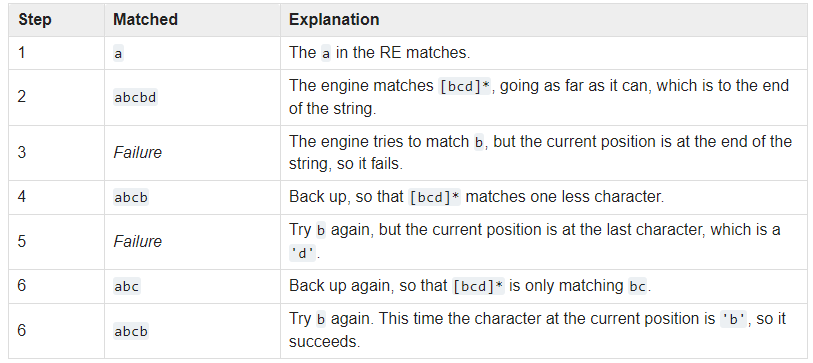

The end of the RE has now been reached, and it has matched 'abcb'. This demonstrates how the matching engine goes as far as it can at first, and if no match is found it will then progressively back up and retry the rest of the RE again and again. It will back up until it has tried zero matches for *[bcd]\**, and if that subsequently fails, the engine will conclude that the string doesn’t match the RE at all.

#### REGEX Queries

Now that we have looked at some simple regular expressions, how do we actually use them in Python? The `re` module provides an interface to the regular expression engine, allowing you to compile REs into objects and then perform matches with them.

**Compiling Regular Expressions**
Regular expressions are compiled into pattern objects, which have methods for various operations such as searching for pattern matches or performing string substitutions.

In [1]:
import re #importing regular expressions library
p = re.compile('ab*') #compiling a pattern object
p

re.compile(r'ab*', re.UNICODE)

`re.compile()` also accepts an optional flags argument, used to enable various special features and syntax variations

In [2]:
p = re.compile('ab*', re.IGNORECASE)

#### Performing Matches

Once you have an object representing a compiled regular expression, what do you do with it? Pattern objects have several methods and attributes. Only the most significant ones will be covered here.

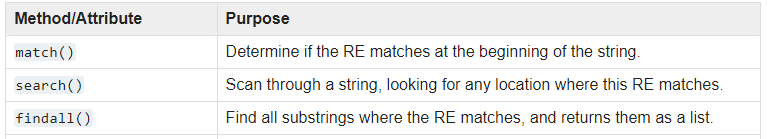

`match()` and `search()` return None if no match can be found. If they’re successful, a match object instance is returned, containing information about the match: where it starts and ends, the substring it matched, and more.

First, run the Python interpreter, import the re module, and compile a RE:

In [3]:
import re
p = re.compile('[a-z]+')
p

re.compile(r'[a-z]+', re.UNICODE)

Now, you can try matching various strings against the RE *[a-z]+*. An empty string shouldn’t match at all, since + means ‘one or more repetitions’. `match()` should return None in this case, which will cause the interpreter to print no output.

In [4]:
p.match("")
print(p.match(""))

None


Let us try it on a string that it should match, such as 'tempo'. In this case, `match()` will return a match object, so you should store the result in a variable for later use.

In [5]:
m = p.match('tempo')
m

<re.Match object; span=(0, 5), match='tempo'>

In actual programs, the most common style is to store the match object in a variable, and then check if it was None. This usually looks like:

In [6]:
p = re.compile( 'abcdef' )
m = p.match( 'abcdef' )
if m:
    print('Match found: ', m.group())
else:
    print('No match')

Match found:  abcdef


`search()` will scan forward through the string, reporting the first match it finds:

In [7]:
print(re.search('super', 'superstition').span())
print(re.search('super', 'insuperable').span())

(0, 5)
(2, 7)


Two pattern methods return all of the matches for a pattern. `findall()` returns a list of matching strings:

In [8]:
p = re.compile(r'\d+')
p.findall('12 horses, 11 cats, 10 dogs')

['12', '11', '10']